<a href="https://colab.research.google.com/github/MirriamJepleting/MirriamJepleting.github.io/blob/main/RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Title: Regression Analysis project
# Name: Mirriam Jepleting
# Date: 27th October 2025
# Description: Regression Analysis using seaborn, matplotlib, sklearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [41]:
from google.colab import files
uploaded = files.upload()

Saving homeprices.csv to homeprices (2).csv


In [ ]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
#checking the shape of the data
df.shape

(5, 2)

In [ ]:
#Data preparation
#checking missing values
df.isnull().sum()

,0
area,0
price,0


In [ ]:
#checking the data info
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes
area     int64
price    int64
dtype: object


In [ ]:
#The Descriptive Statistics
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


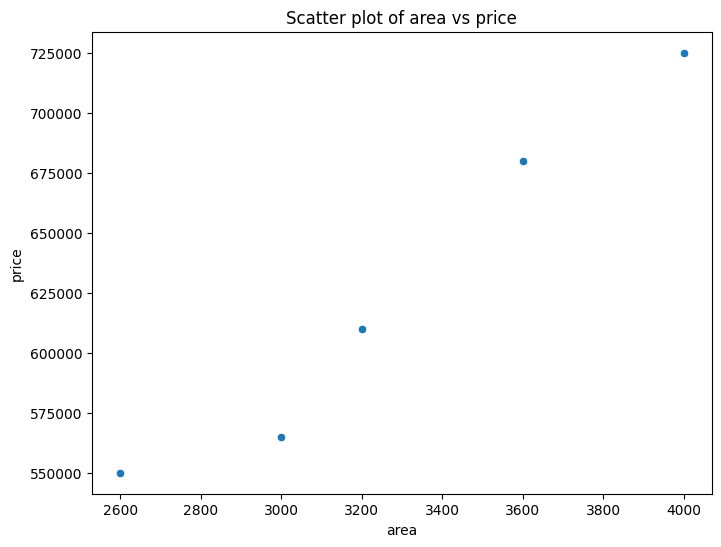

In [ ]:
#Visualizing the data using the Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Scatter plot of area vs price')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [ ]:

# Feature (X) and target (y)
X = df[['area']]
y = df['price']

In [ ]:
# Splitting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
#Building and Training the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Viewing the model Parameters
print("\nModel trained successfully!")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Model trained successfully!
Intercept: 211542.05607476638
Coefficient: 128.27102803738316


In [ ]:
#Predictions
y_pred = model.predict(X_test)

In [ ]:
#Comparison of Actual and Predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

   Actual      Predicted
1  565000  596355.140187


In [ ]:
#Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#Displaying The model evaluation results
#ignored the R2 for now because of small samples
print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation:
Mean Absolute Error (MAE): 31355.14
Mean Squared Error (MSE): 983144816.14
Root Mean Squared Error (RMSE): 31355.14


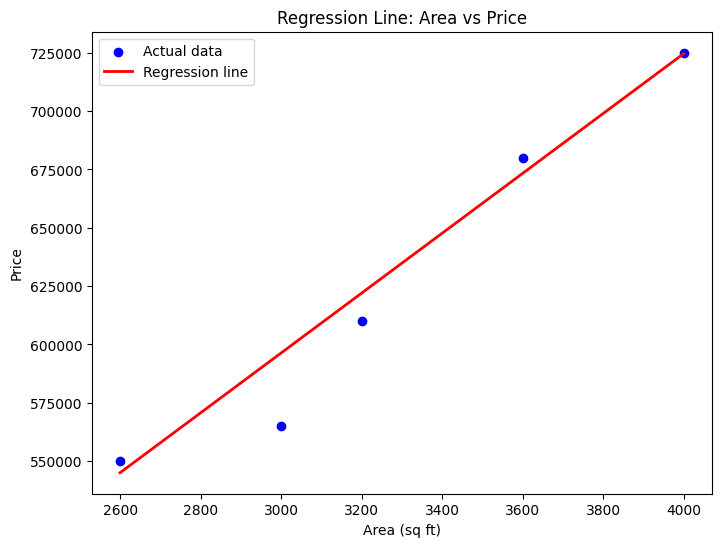

In [ ]:
#Visualization the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.title('Regression Line: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.show()
